# Diabetes

<img src=https://www.sanpablo.com.pe/wp-content/uploads/2021/07/diabetes.jpg>

En este estudio realizaremos un análisis exploratorio de datos acerca de la posiblidad de padecer o no diabetes

In [116]:
### Bibliotecas básicas de gestión de datos
import pandas as pd
import numpy as np

### Bibliotecas gráficas
import matplotlib.pyplot as plt
import seaborn as sns 

### Utilidades Scikit-learn 
from sklearn.model_selection import train_test_split

### Métricas
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc

### Modelos
from xgboost import XGBClassifier, plot_importance

########################################################
### Para un flujo de trabajo más rápido, las bibliotecas de Interpretabilidad
### se instalarán/cargarán sobre la marcha del tutorial
########################################################

### Add-ons adicionales
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

## Conjunto de datos

Los conjuntos de datos constan de varias variables médicas predictoras y una variable objetivo, el resultado. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, su nivel de insulina, su edad, etc.

https://www.kaggle.com/uciml/pima-indians-diabetes-database

### Clases:
- Clase 1: normal (500) (65,10%)
- Clase 2: diabetes de indios Pima (268) (39,89%)

### Variables
- Feature 1: Number of times pregnant (Pregn).
- Feature 2: Plasma glucose concentration a 2 h in an oral glucose tolerance test (Gluco).
- Feature 3: Diastolic blood pressure (mm Hg) (Diasp).
- Feature 4: Triceps skin fold thickness (mm) (Thick).
- Feature 5: 2-h serum insulin (lU/ml)(Insul).
- Feature 6: Body mass index (weight in kg/(heightinm).
- Feature 7: Diabetes pedigree function (Predf).
- Feature 9: Age (years) (Age).
- Class: Diabetes onset within five years (0 or l)(Yes or No) 

#### Español
- Rasgo 1: Número de veces que ha estado embarazada (Pregn).
- Rasgo 2: concentración de glucosa en plasma a las 2 h en una prueba de tolerancia a la glucosa oral (Gluco).
- Rasgo 3: presión arterial diastólica (mm Hg) (Diasp).
- Rasgo 4: grosor del pliegue cutáneo del tríceps (mm) (Thick).
- Rasgo 5: insulina sérica de 2 horas (lU/ml) (Insul).
- Rasgo 6: Índice de masa corporal (peso en kg/(alturaenm).
- Rasgo 7: Diabetes pedigree function (una función que puntúa la probabilidad de padecer diabetes en función de los antecedentes familiares)
- Rasgo 9: Edad (años) (Age).
- Clase: Variable de clase (0 si no es diabético, 1 si es diabético) 

In [117]:
# Carga del dataset en un dataframe
df = pd.read_csv('./data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [118]:
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [119]:
# Tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [120]:
# Estadísticas descriptivas
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [121]:
# Haremos por seguridad una copia del marco de datos original antes de su procesamiento posterior 
diabetes = df.copy()

### Técnicas pre-modelo. Análisis y visualización de datos

El análisis y la visualización de los datos de exploración son las primeras herramientas para interpretar y obtener conocimientos latentes de los datos. Nos ayudan a identificar las características clave y las representaciones significativas, incluso con grandes conjuntos de datos con, por ejemplo, técnicas de reducción de la dimensionalidad (PCA, t-SNE, etc.). 

Las técnicas de interpretabilidad previas al modelo son independientes del modelo, ya que sólo son aplicables a los propios datos. La interpretabilidad pre-modelo suele producirse antes de la selección del modelo, ya que también es importante explorar y tener una buena comprensión de los datos antes de pensar en el modelo. Las características intuitivas significativas y la escasez (bajo número de características) son algunas propiedades que ayudan a lograr la interpretabilidad de los datos.

Así que ahora vamos a hacer un rápido análisis de datos de exploración para ver cómo se distribuyen y correlacionan los datos.

In [122]:
# Extrayendo nuestra variable objetivo 'Outcome'
# y creando una lista de características útiles de las variables dependientes
target = 'Outcome'
features_list = list(diabetes.columns)
features_list.remove(target)
print(features_list)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


### Análisis univariante 

El gráfico muestra que algunas características, como la insulina y el grosor de la piel, presentan un pico de valores en 0, que no es un valor admisible para esas características. Así que, probablemente, esos valores se han insertado donde faltaba el valor correspondiente.

Comprobemos cuántos valores 0 hay en el conjunto de datos:

In [123]:
df.drop( "Outcome", axis=1 ).isin( [ 0 ] ).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

Podemos ver que, aparte de DiabetesPedigreeFunction y Edad, todas las demás columnas tienen valores 0. Entre ellas, la única que podría tener valores 0 admisibles es Embarazos. Por lo tanto, consideraré todos los demás valores como ausentes y tendré que tratarlos en la fase de preprocesamiento.

Por ahora, me limitaré a anotar las columnas que presentan valores perdidos y las sustituiré por valores medios de cada columna, para evitar suposiciones erróneas y gráficos sesgados en el siguiente análisis:

Revisamos cómo quedan los histogramas sin hacer ajustes sobre los campos con valo 0

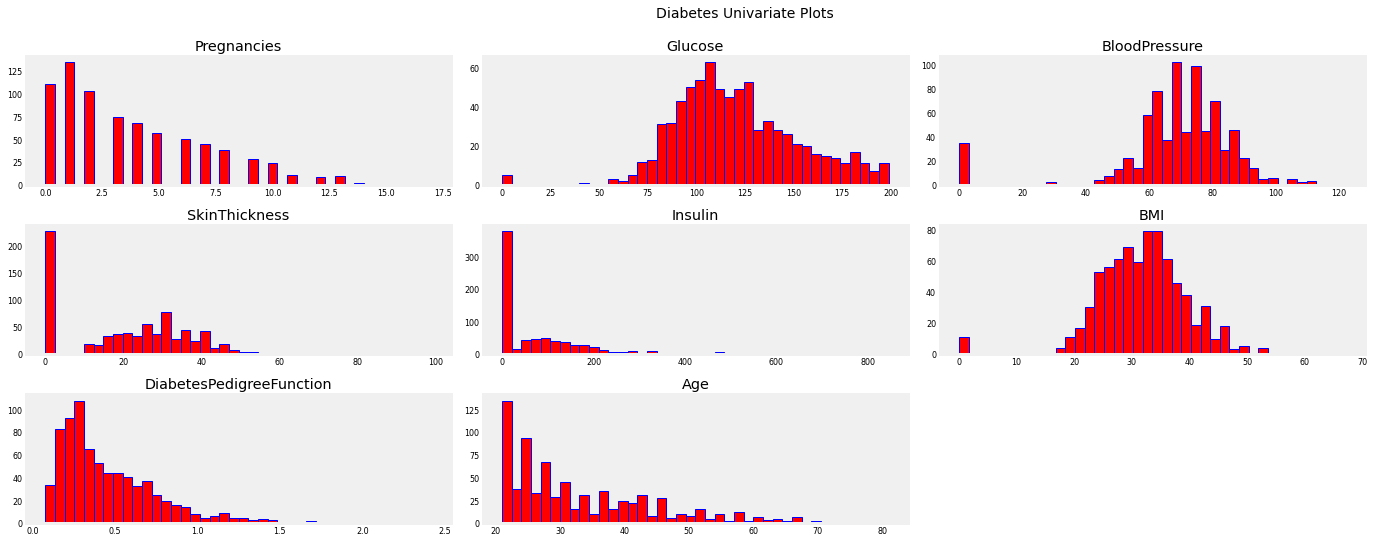

In [124]:
df[features_list].hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False, 
                          figsize=(16,6), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Diabetes Univariate Plots', x=0.65, y=1.25, fontsize=14);  

In [125]:
# columns_with_missing_values = [ "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI" ]

# for col in columns_with_missing_values:
#     diabetes[ col ] = diabetes[ col ].replace( to_replace=0, value=np.NaN )
# diabetes.describe()

# He cambiado el valor a media, debido a que NaN da errores en PDP / ICE

In [126]:
columns_with_missing_values = [ "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI" ]

for col in columns_with_missing_values:
    diabetes[ col ] = diabetes[ col ].replace( to_replace=0, value=np.mean(diabetes [col] ))
    
print(diabetes)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627

Comprobemos cómo han cambiado los histogramas tras la sustitución:

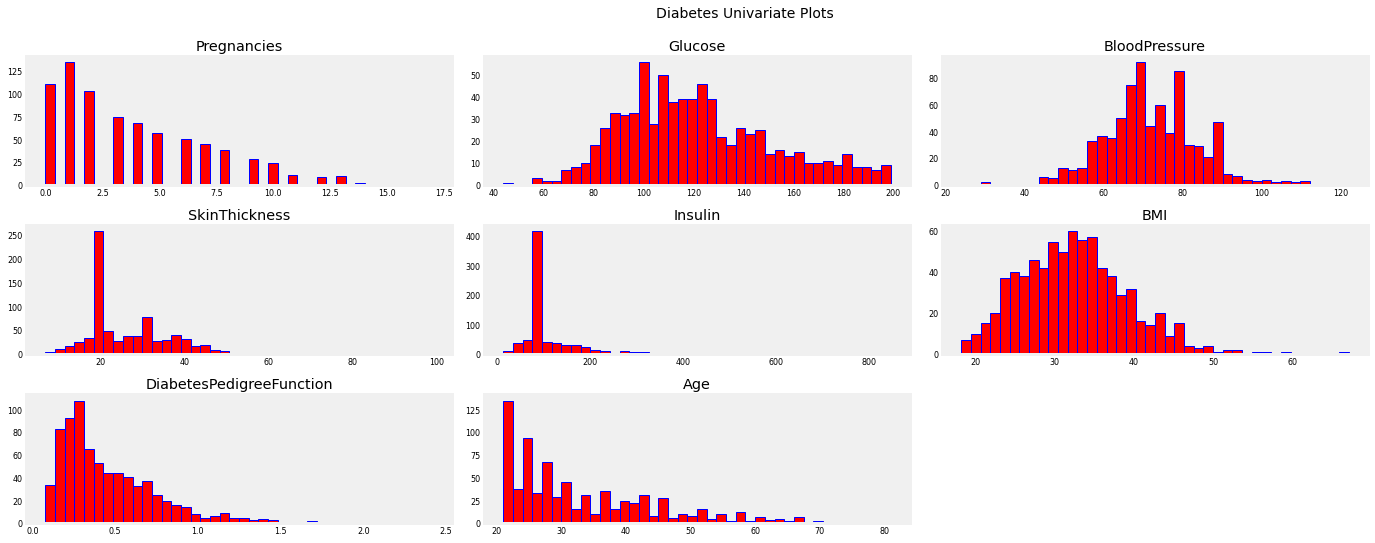

In [127]:
diabetes[features_list].hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False, 
                          figsize=(16,6), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Diabetes Univariate Plots', x=0.65, y=1.25, fontsize=14);  

In [128]:
diabetes.isin( [ 0 ] ).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

### Distribución de Outcomes

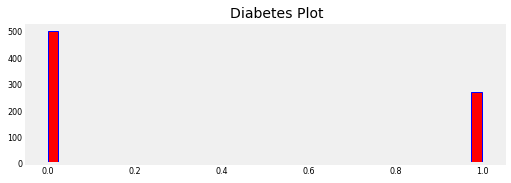

In [129]:
diabetes[target].hist(bins=40, edgecolor='b', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False, figsize=(6,2), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Diabetes Plot', x=0.65, y=1.25, fontsize=14);  

### Análisis multivariante

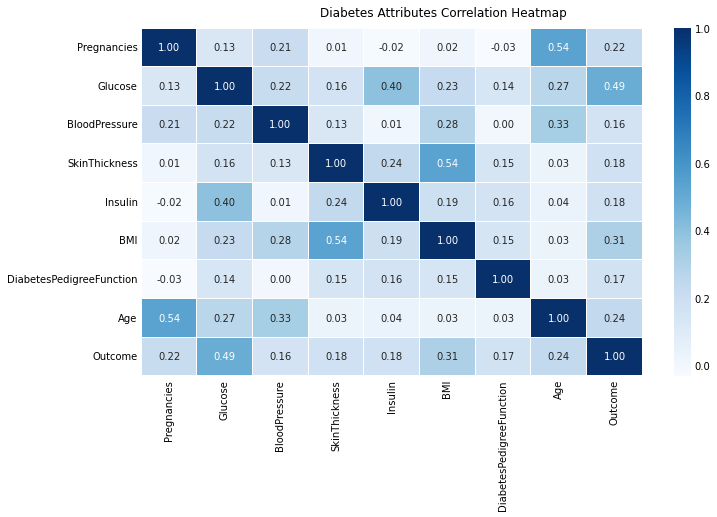

In [130]:
# Visualizamos las correlaciones
f, ax = plt.subplots(figsize=(10, 6))
corr = diabetes.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Blues",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Diabetes Attributes Correlation Heatmap', fontsize=12)

A partir de la matriz de correlación podemos ver que no hay características altamente correlacionadas, pero todavía hay algunas características que parecen tener algún tipo de relación como sugiere el valor del índice de correlación alrededor de 0,5.

Estas características son:

- Edad - Embarazos: esto es razonable ya que el número de embarazos sólo puede aumentar a medida que aumenta la edad.
- Glucosa - Diabetes: podemos deducir que una mayor concentración de glucosa está relacionada con una mayor probabilidad de ser diagnosticada de diabetes. Esto también se confirma con la información adicional sobre la diabetes que se ha indicado en la introducción.
- Glucosa - Insulina: podemos deducir que cuando hay un mayor nivel de glucosa en la sangre, el cuerpo produce más insulina.
- IMC - Espesor de la piel: las personas con un mayor Índice de Masa Corporal parecen tener una piel más gruesa.

### Características bivariadas frente al resultado

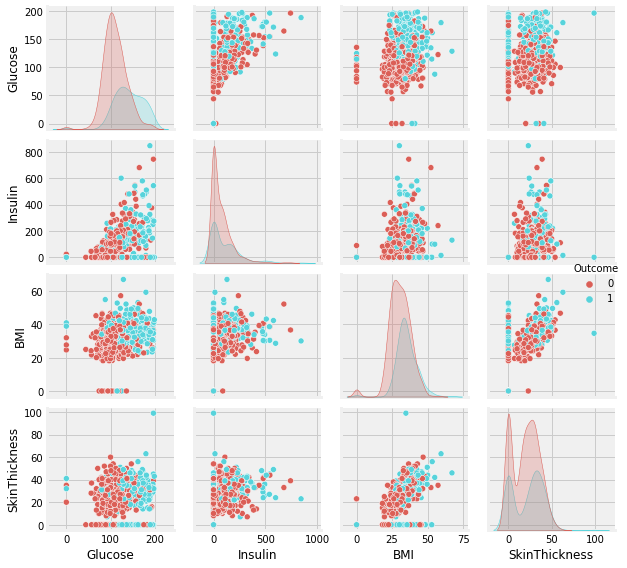

In [131]:
sns.pairplot( df.dropna(), vars=[ 'Glucose', 'Insulin', 'BMI', 'SkinThickness' ], size=2, diag_kind='kde', palette='hls', hue='Outcome' )
plt.tight_layout()
plt.show()

Como era de esperar, el gráfico confirma lo que hemos descubierto mirando la matriz de correlación: parece haber una relación lineal positiva entre la insulina y la glucosa y también entre el IMC y el grosor de la piel, donde la correlación es aún más clara.

Observando la diagonal también podemos ver la distribución de las características separadas por clase. Podemos ver que las personas con diabetes tienden a tener valores más altos en cada una de esas características.